In [15]:
from matplotlib import pyplot as plt
from matplotlib import cm
import numpy as np
import time
from scipy.stats import skew
from scipy.sparse.linalg import eigsh
import os
import re
import pandas as pd
import time
import datetime
import ciso8601
def hasNumbers(inputString):
    return bool(re.search(r'\d', inputString))


In [16]:
ffolder = 'Z:\\Jason Gao\\Satiety_behavior_JG_041921\\050821\\20210508-154659 JGWT1\\'
pybpod_file = [f for f in os.listdir(ffolder) if f.endswith(".csv") and hasNumbers(f)]
pybpod_data = pd.read_csv(ffolder + pybpod_file[0], skiprows=6, delimiter = ';')


timestamp = []
for i in range(len(pybpod_data.index)):
    t = pybpod_data['PC-TIME'].iloc[i]
    ts= ciso8601.parse_datetime(t)
    if i == 0:
        t0= time.mktime(ts.timetuple())+ts.microsecond/1000000
        timestamp.append(np.around(t0-t0,3))
    else:
        tnow = time.mktime(ts.timetuple())+ts.microsecond/1000000
        timestamp.append(np.around(tnow-t0,3))

pybpod_data['timestamps'] = timestamp
df_group_MSG = pybpod_data.groupby('MSG')

# Find timestamps for BNC1_CameraON & BNC1_CameraOFF
df_bnc1high = df_group_MSG.get_group('BNC1_CameraON')
timestamp_bnc1_cameraon = df_bnc1high.timestamps.to_numpy()[0]

df_bnc1high = df_group_MSG.get_group('BNC1_CameraOFF')
timestamp_bnc1_cameraoff = df_bnc1high.timestamps.to_numpy()[0]

print(timestamp_bnc1_cameraon, timestamp_bnc1_cameraoff)
print(timestamp_bnc1_cameraoff-timestamp_bnc1_cameraon)

1.441 2975.05
2973.6090000000004


In [17]:
proc = np.load('Z:\\Jason Gao\\Satiety_behavior_JG_041921\\050821\\JGWT1(1)-05082021154621_proc.npy', allow_pickle=True).item()

In [18]:
from scipy.interpolate import interp1d
#downsample from 33fps to 1fps
fnumber =  np.int(np.size(proc['pupil'][0]['area_smooth'])/33)

def downsample(array, npts):
    interpolated = interp1d(np.arange(len(array)), array, axis = 0, fill_value = 'extrapolate')
    downsampled = interpolated(np.linspace(0, len(array), npts))
    return downsampled

pupil1s = downsample(proc['pupil'][0]['area_smooth'], fnumber)
pupil1s = pupil1s/np.max(pupil1s)
time_pupil1s = np.linspace(timestamp_bnc1_cameraon, timestamp_bnc1_cameraoff, fnumber)
%store pupil1s
%store time_pupil1s

Stored 'pupil1s' (ndarray)
Stored 'time_pupil1s' (ndarray)


In [ ]:
time_pupil1s[0:2]

In [ ]:
np.shape((proc['motMask_reshape'][1][:,:,1]))

In [ ]:
plt.imshow(proc['avgmotion_reshape'])
plt.axis('off')

In [ ]:
plt.figure(figsize=(15,8))
for i in range(15):
    ax=plt.subplot(3,5,i+1)
    ax.imshow((proc['motMask_reshape'][1][:,:,i]) / (proc['motMask_reshape'][1][:,:,i]).std(), vmin=-2, vmax=2)
    ax.axis('off')
plt.show()

In [ ]:
plt.figure(figsize=(15,3))
# flip traces
cmap = cm.get_cmap('hsv')
cmap = cmap(np.linspace(0,.8,20))
for n in range(20):
    plt.plot(proc['motSVD'][1][:1000,n], color=cmap[n,:])
plt.show()

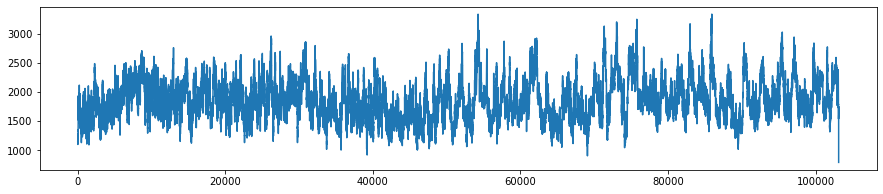

In [29]:
#plot the pupil size & blink
plt.figure(figsize=(15,3))
plt.plot(proc['pupil'][0]['area_smooth'])
# plt.plot(proc['blink'][0][:2000]/1000)


Stored 'pupil1s' (ndarray)
Stored 'time_pupil1s' (ndarray)


In [10]:
np.size(proc['pupil'][0]['area_smooth'])/33

3125.4242424242425

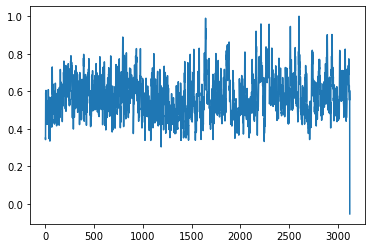

In [40]:
pupil1s_normed = pupil1s/np.max(pupil1s)
plt.plot(pupil1s_normed)

In [ ]:
np.size(pupil1s)

In [ ]:
plt.figure(figsize=(3,15))
for i in range(5):
    ax=plt.subplot(5,1,i+1)
    ax.imshow((proc['motMask_reshape'][1][:,:,i]) / (proc['motMask_reshape'][1][:,:,i]).std(), vmin=-2, vmax=2)
    ax.axis('off')
plt.show()

In [ ]:
plt.figure(figsize=(15,15))
for i in range(5):
    plt.subplot(5,1,i+1)
    plt.plot(proc['motSVD'][1][:33000,i], color = 'black')
    plt.xticks([0,16500,33000],[0,500,1000])
#     plt.xlabel('time [s]')
plt.show()